In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [2]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

epochs = 10000
lr = 0.1

#X_vals = np.c_[np.ones((3*N,1)),X]
X_vals = X
y_vals = y

print(X_vals)
print(y_vals)

X = tf.placeholder(tf.float32, shape=(None,2))
Y = tf.placeholder(tf.int32, shape=(None))

n_hidden1 =100

with tf.name_scope("nn"):
    hidden_1 = fully_connected(X,n_hidden1,scope="hidden1")
    logits = fully_connected(hidden_1,K,scope="outputs",activation_fn=None)

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=Y,logits=logits)
    loss = tf.reduce_mean(xentropy,name="loss")


with tf.name_scope("eval"):
    correct  = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))


optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

sess = tf.Session()
sess.run(tf.initialize_all_variables())

for i in range(epochs+1):
    sess.run(optimizer,feed_dict={X: X_vals, Y: y_vals })
    acc_train = sess.run(accuracy,feed_dict={X: X_vals, Y: y_vals })
    if i % 1000 == 0:
        print(i)
        print(acc_train)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


[[  0.00000000e+00   0.00000000e+00]
 [  2.29128685e-03   9.83770347e-03]
 [  1.90095894e-03   2.01123836e-02]
 [  8.67404965e-04   3.02906133e-02]
 [  1.10846036e-02   3.88538035e-02]
 [  7.52594994e-03   4.99411674e-02]
 [  1.34259366e-02   5.91002437e-02]
 [  4.24656448e-02   5.65345811e-02]
 [  4.45703122e-02   6.74049939e-02]
 [  3.45531813e-02   8.40865059e-02]
 [  6.30281909e-02   7.89334382e-02]
 [  3.08594863e-02   1.06739735e-01]
 [  2.37209175e-02   1.18868400e-01]
 [  6.53065896e-02   1.13921850e-01]
 [  6.11658804e-02   1.27501743e-01]
 [  1.43844534e-01   4.75982261e-02]
 [  9.40276853e-02   1.31448005e-01]
 [  9.76780310e-02   1.41229563e-01]
 [  1.50206834e-01   1.02448808e-01]
 [  1.12494241e-01   1.55492835e-01]
 [  1.74324480e-01   1.02093769e-01]
 [  1.42275700e-01   1.57330969e-01]
 [  1.19693315e-01   1.87233080e-01]
 [  2.31137462e-01   2.34426481e-02]
 [  1.75956869e-01   1.66759388e-01]
 [  2.34596076e-01   9.34541816e-02]
 [  2.24193086e-01   1.36784553e-01]
 

Instructions for updating:
Use `tf.global_variables_initializer` instead.
0
0.283333
1000
0.77
2000
0.876667
3000
0.906667
4000
0.926667
5000
0.95
6000
0.97
7000
0.973333
8000
0.98
9000
0.99
10000
0.99


(10000, 2)
(10000,)


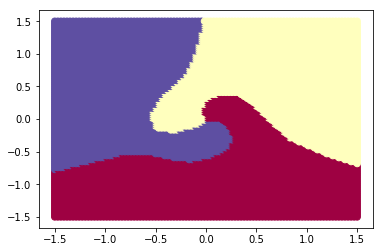

In [3]:
S=100
X_p,Y_p = np.meshgrid(np.linspace(-1.5,1.5,S),np.linspace(-1.5,1.5,S))
X_p = X_p.reshape(S**2,1)
Y_p = Y_p.reshape(S**2,1)
X_p = np.hstack([X_p,Y_p])
probas  = sess.run(logits,feed_dict={X: X_p })
predicted_class = np.argmax(probas, axis=1)
print(X_p.shape)
print(predicted_class.shape)
plt.scatter(X_p[:, 0], X_p[:, 1], c=predicted_class, s=40, cmap=plt.cm.Spectral)
plt.show()